In [23]:
import numpy as np
import sys

In [24]:
counter_add = 0
counter_mul = 0
counter_sub = 0

In [25]:
# Case for square matrix
# def binet_pow(A, B):

#     n = A.shape[0]

#     if n == 1:
#         return np.array([[A[0][0] * B[0][0]]])

#     # Split matrices into quadrants
#     mid = n // 2
    
#     A11 = A[:mid, :mid]
#     A12 = A[:mid, mid:]
#     A21 = A[mid:, :mid]
#     A22 = A[mid:, mid:]
    
#     B11 = B[:mid, :mid]
#     B12 = B[:mid, mid:]
#     B21 = B[mid:, :mid]
#     B22 = B[mid:, mid:]
    

#     # Recursive matrix multiplications
#     C11 = rec(A11, B11) + rec(A12, B21)
#     C12 = rec(A11, B12) + rec(A12, B22)
#     C21 = rec(A21, B11) + rec(A22, B21)
#     C22 = rec(A21, B12) + rec(A22, B22)

#     # Combine quadrants into result matrix
#     C = np.zeros((n, n))
#     C[:mid, :mid] = C11
#     C[:mid, mid:] = C12
#     C[mid:, :mid] = C21
#     C[mid:, mid:] = C22
    
#     return C

In [26]:
def binet(A, B):
    def rec(A, B):
        n = A.shape[0]
        m = A.shape[1]
        p = B.shape[1]
        assert(A.shape[1] == B.shape[0])

        if n == 1 and p == 1 and m == 1:
            return np.array([[A[0][0] * B[0][0]]])

        max_dim = max(n, m, p)
        
        if max_dim == n:
            # Splitting A vertically
            mid_A = n // 2
            Avert1 = A[:mid_A, :] 
            Avert2 = A[mid_A:, :]
            C = np.zeros((n, p))
            C[:mid_A, :] = rec(Avert1, B) 
            C[mid_A:, :] = rec(Avert2, B)
            return C
        elif max_dim == p:
            # Splitting B horizontally
            mid_B = p // 2
            Bhor1 = B[:, :mid_B] 
            Bhor2 = B[:, mid_B:]
            C = np.zeros((n, p))
            C[:, :mid_B] = rec(A, Bhor1) 
            C[:, mid_B:] = rec(A, Bhor2)
            return C
        elif max_dim == m:
            # Splitting A and B
            mid_m = m // 2
            Avert1 = A[:, :mid_m] 
            Avert2 = A[:, mid_m:]
            Bhor1 = B[:mid_m, :] 
            Bhor2 = B[mid_m:, :]
            C = np.zeros((n, p))
            C = rec(Avert1, Bhor1) + rec(Avert2, Bhor2)
            return C
    C = rec(A, B).tolist()
    return C


In [27]:
A = [[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12],
     [13,14,15,16]]

B = [[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12],
     [13,14,15,16]]
C = [[90, 100, 110, 120], [202, 228, 254, 280], [314, 356, 398, 440], [426, 484, 542, 600]]


A = np.array(A)
B = np.array(B)

print(np.dot(A, B))
print(binet(A,B))

[[ 90 100 110 120]
 [202 228 254 280]
 [314 356 398 440]
 [426 484 542 600]]
[[90.0, 100.0, 110.0, 120.0], [202.0, 228.0, 254.0, 280.0], [314.0, 356.0, 398.0, 440.0], [426.0, 484.0, 542.0, 600.0]]


In [28]:

A = [[1,2,3],
     [4,5,6],
     [7,8,9]]

B = [[9,8,7],
     [6,5,4],
     [3,2,1]]

C = [[30, 24, 18], [84, 69, 54], [138, 114, 90]]
print(np.dot(A, B))
print(C)

[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
[[30, 24, 18], [84, 69, 54], [138, 114, 90]]


In [29]:
add_counters = []
sub_counters = []
mul_counters = []
time_counters = []
mem_counters = []

In [30]:
def clear_counters():
    global counter_add, counter_mul, counter_sub
    counter_add, counter_mul, counter_sub = 0, 0, 0
    
clear_counters()

In [31]:
from random import randint
from random import uniform

def randomize_matrix(n):
    return [[uniform(1e-8, 1) for _ in range(n)] for _ in range(n)]

def check_mat(C, C_test, tol=1e-9):
    return np.allclose(C, C_test, atol=tol)

In [39]:
clear_counters()

In [40]:
import tracemalloc
import time

correct_count = 0

for n in range(2, 25):
    print("Computing n =", n)

    A = randomize_matrix(n)
    B = randomize_matrix(n)

    tracemalloc.start()
    start_time = time.time()

    A = np.array(A)
    B = np.array(B)

    if check_mat(binet(A, B), np.dot(A, B).tolist()):
        correct_count += 1

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    mem_counters.append(peak / 10**6)
    time_counters.append(end_time - start_time)
    add_counters.append(counter_add)
    mul_counters.append(counter_mul)
    sub_counters.append(counter_sub)
    clear_counters()
print(correct_count)

Computing n = 2
Computing n = 3
Computing n = 4
Computing n = 5
Computing n = 6
Computing n = 7
Computing n = 8
Computing n = 9
Computing n = 10
Computing n = 11
Computing n = 12
Computing n = 13
Computing n = 14
Computing n = 15
Computing n = 16
Computing n = 17
Computing n = 18
Computing n = 19
Computing n = 20
Computing n = 21
Computing n = 22
Computing n = 23
Computing n = 24
23


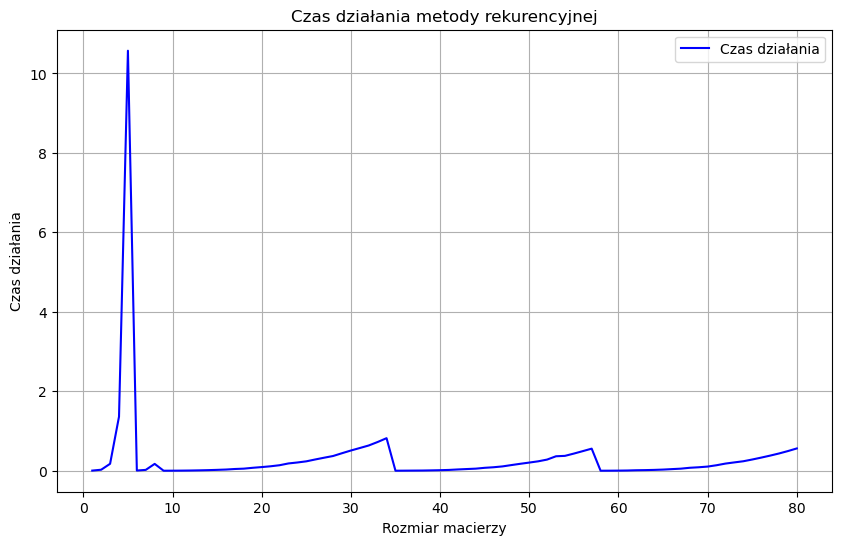

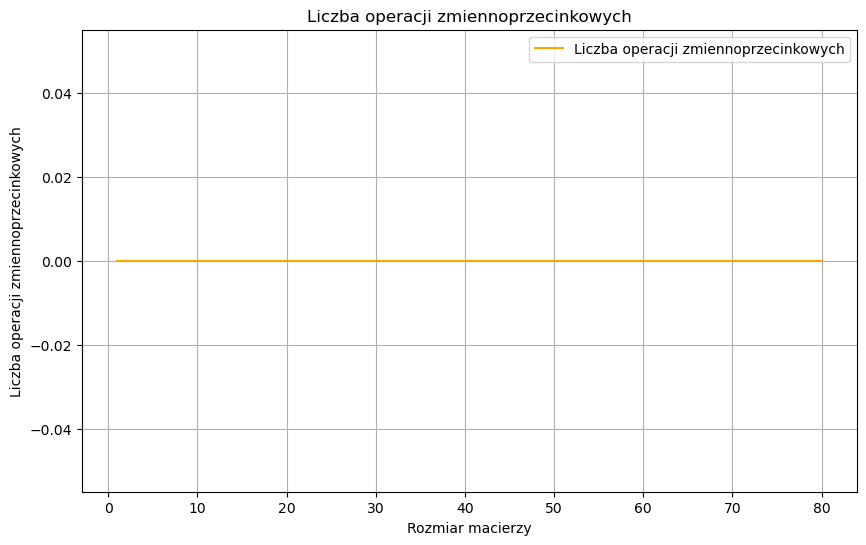

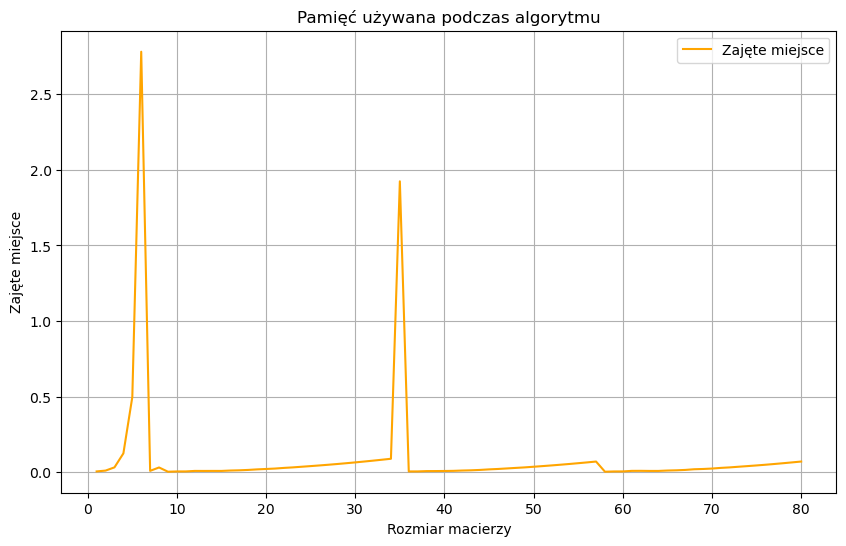

In [41]:
import matplotlib.pyplot as plt
# Wykres 1: Czas działania metody rekurencyjnej
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(time_counters) + 1), time_counters, label="Czas działania", color='blue')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas działania")
plt.title("Czas działania metody rekurencyjnej")
plt.legend()
plt.grid(True)
plt.show()

# Wykres 2: Liczba operacji zmiennoprzecinkowych
zmiennop = [add + sub + mul for add, sub, mul in zip(add_counters, sub_counters, mul_counters)]
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(zmiennop) + 1), zmiennop, label="Liczba operacji zmiennoprzecinkowych", color='orange')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Liczba operacji zmiennoprzecinkowych")
plt.title("Liczba operacji zmiennoprzecinkowych")
plt.legend()
plt.grid(True)
plt.show()

# Wykres 2: Liczba zajętej pamięci
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mem_counters) + 1), mem_counters, label="Zajęte miejsce", color='orange')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Zajęte miejsce")
plt.title("Pamięć używana podczas algorytmu")
plt.legend()
plt.grid(True)
plt.show()